# **Titanic Analysis**

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## **Business Understanding**
For the Titanic dataset, the primary business objective is to predict which passengers survived the disaster, helping to uncover patterns that influenced survival rates. This phase involves clarifying key questions, such as determining which passenger characteristics (e.g., age, gender, class) had the greatest impact on survival.

Stakeholders’ needs and goals are identified, and potential business use cases are discussed, such as improving future maritime safety protocols based on insights from the analysis. Clear problem definition and measurable success criteria are established before moving on to the data exploration stages.

## Importing necessary Libraries


In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer

In [169]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [170]:
# Reading the CSV file
df = pd.read_csv("/content/drive/MyDrive/Tutorial/Machine Learning/Titanic/titanic_dataset.csv")

In [171]:
# Print the DataFrame
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1. PassengerId: Unique identifier for each passenger.
2. Survived: Survival status (0 = No, 1 = Yes).
3. Pclass: Passenger class (1 = 1st class, 2 = 2nd class, 3 = 3rd class).
4. Name: Name of the passenger.
5. Sex: Gender of the passenger (male or female).
6. Age: Age of the passenger.
7. SibSp: Number of siblings or spouses aboard the Titanic.
8. Parch: Number of parents or children aboard the Titanic.
9. Ticket: Ticket number.
10. Fare: Passenger fare (ticket price).
11. Cabin: Cabin number.
12. Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

In [172]:
# Shape of the dataset
df.shape

(891, 12)

In [173]:
# Checking for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## **Data Understanding**

In the Titanic dataset, we will explore key variables such as survival status, passenger class, age, and gender to gain insights into their distribution and relationships. Statistical summaries and visualizations are used to detect missing data, outliers, and anomalies, particularly in critical fields like age and cabin numbers. Understanding the relationships between variables, such as how gender and class impact survival rates.

Y = f(X)

Output = f(input)


**Y** = Survival

**X** = passenger class, age, gender, SibSp, Parch,	Fare,	Cabin, and	Embarked

In [174]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [175]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [176]:
df = df.drop(['PassengerId', 'Name','Ticket','Cabin'], axis=1)

### **Missing Data**

In [177]:
# Cheking for missing data
df.isnull().mean()*100

,0
Survived,0.000000
Pclass,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Fare,0.000000
Embarked,0.224467


In [178]:
# Numerical Values computation of the missing values with the K-nearest neighbour
imputer = KNNImputer(n_neighbors=5)

for col in ['Age']:
    imputed_values = imputer.fit_transform(df[[col]])
    df[col] = imputed_values

In [179]:
df.dropna(inplace=True)

In [180]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


### **Data Visualization**

In [181]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
numeric_df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.335549,-0.074673,-0.034040,0.083151,0.255290
Pclass,-0.335549,1.000000,-0.327954,0.081656,0.016824,-0.548193
Age,-0.074673,-0.327954,1.000000,-0.231875,-0.178232,0.088604
SibSp,-0.034040,0.081656,-0.231875,1.000000,0.414542,0.160887
Parch,0.083151,0.016824,-0.178232,0.414542,1.000000,0.217532
Fare,0.255290,-0.548193,0.088604,0.160887,0.217532,1.000000


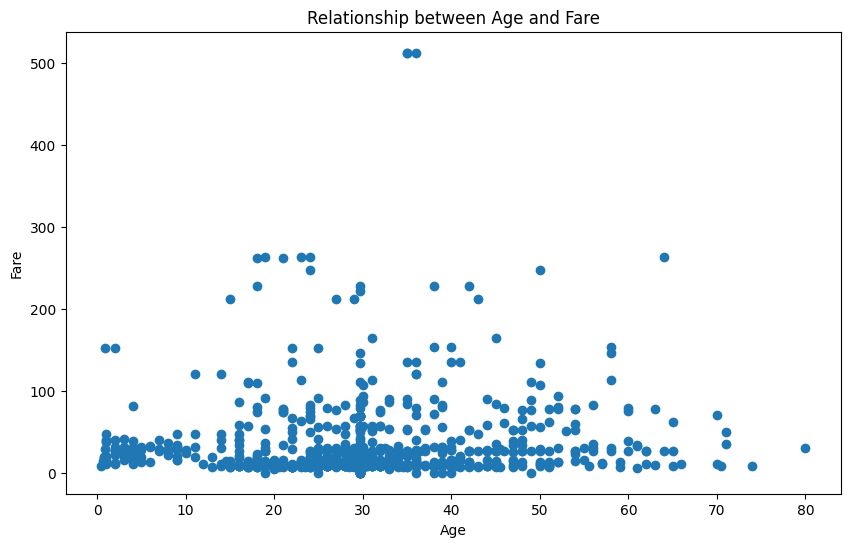

In [182]:
plt.figure(figsize = (10,6))
plt.scatter('Age', 'Fare', data = df)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Relationship between Age and Fare")
plt.show()

The scatter plot shows no relationship between age and the fare one paid

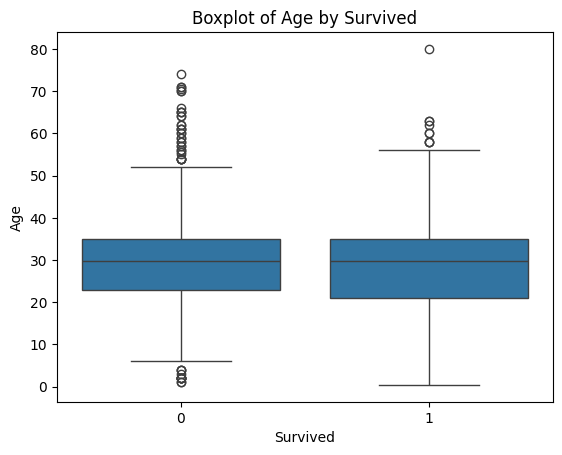

In [183]:
# Boxplot of Age by Survived
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Boxplot of Age by Survived')
plt.show()

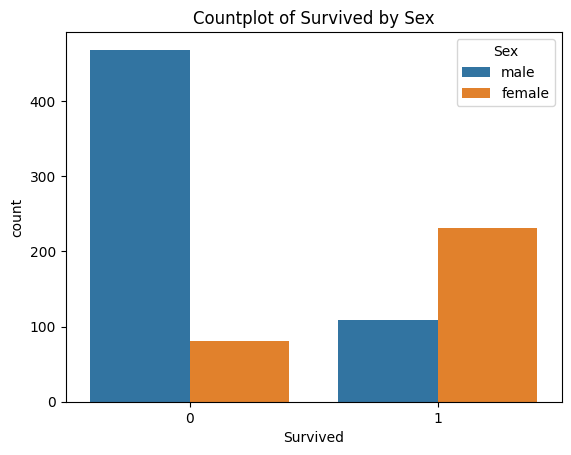

In [184]:
# Countplot of Survived by Sex
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Countplot of Survived by Sex')
plt.show()

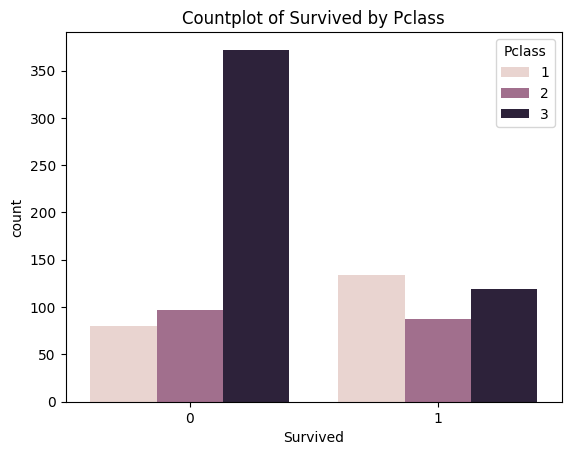

In [185]:
# Countplot of Survived by Pclass
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Countplot of Survived by Pclass')
plt.show()

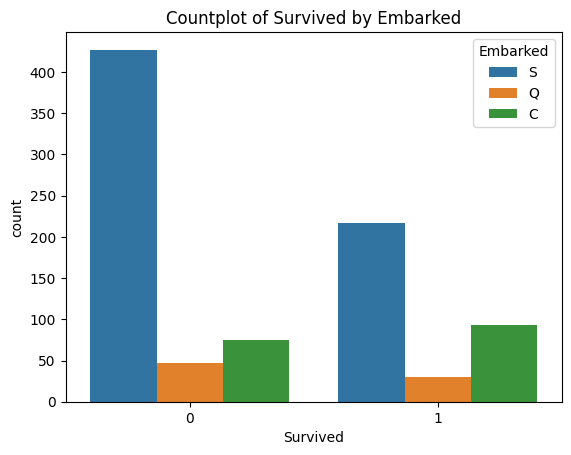

In [186]:
# Countplot of Survived by Embarked
sns.countplot(x='Survived', hue='Embarked', data=df)
plt.title('Countplot of Survived by Embarked')
plt.show()

In [187]:
pd.get_dummies(df['Embarked']).astype(int).head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [188]:
df.dtypes

,0
Survived,int64
Pclass,int64
Sex,object
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,object


In [189]:
# Assuming 'df' is your DataFrame
df['Pclass'] = df['Pclass'].astype(str)
df['SibSp'] = df['SibSp'].astype(str)
df['Parch'] = df['Parch'].astype(str)

In [190]:
#pd.get_dummies(df['Pclass']).astype(int).head()

In [191]:
df = pd.get_dummies(df).astype(int)
df.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22,7,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38,71,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26,7,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35,53,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35,8,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [192]:
#shape of the data
df.shape

(889, 25)

In [193]:
#checking missing values in the data
df.isnull().sum()

,0
Survived,0
Age,0
Fare,0
Pclass_1,0
Pclass_2,0
Pclass_3,0
Sex_female,0
Sex_male,0
SibSp_0,0
SibSp_1,0


## **Model Building**

In [194]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [195]:
logistic_model = LogisticRegression()

In [196]:
# To build any Model using sklearn we have to specify Dependent and Independent Variables
#seperating independent and dependent variables
y = df['Survived']
X = df.drop(['Survived'], axis=1)

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101, stratify=y, test_size=0.20)

In [198]:
logistic_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [199]:
logistic_preds_test = logistic_model.predict(X_test)
logistic_preds_test

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0])

In [200]:
np.array(y_test)

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0])

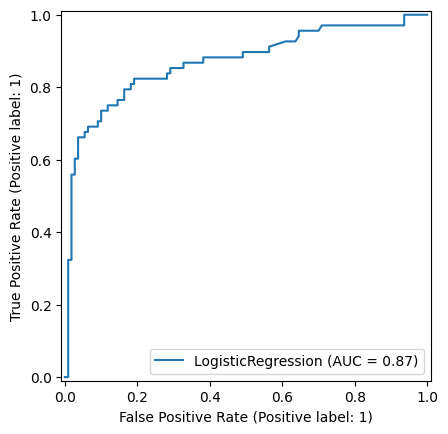

In [201]:
# Plot the ROC Plot
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(logistic_model, X_test, y_test)
plt.show()

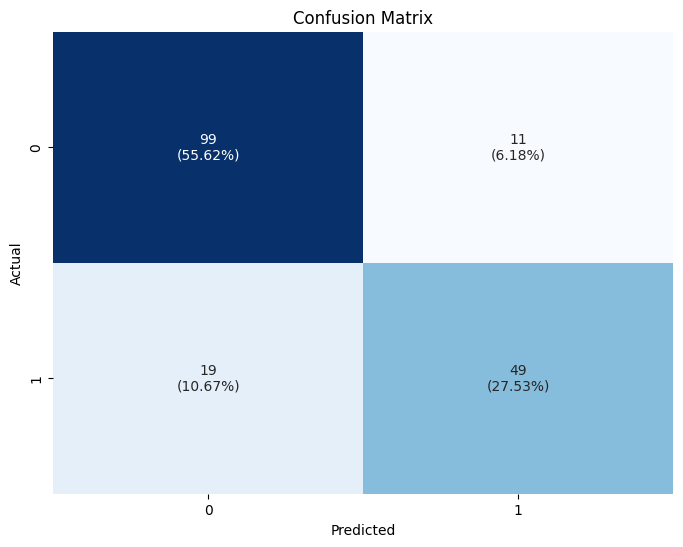

In [202]:
# Rename the variable storing the confusion matrix to avoid name conflict
confusion_matrix_data = confusion_matrix(y_test, logistic_preds_test)
confusion_matrix_percentage = (confusion_matrix_data / np.sum(confusion_matrix_data)) * 100

annotations = np.empty_like(confusion_matrix_data).astype(str)

for i in range(confusion_matrix_data.shape[0]):
    for j in range(confusion_matrix_data.shape[1]):
        annotations[i, j] = f'{confusion_matrix_data[i, j]}\n({confusion_matrix_percentage[i, j]:.2f}%)'

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_data, annot=annotations, fmt='', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

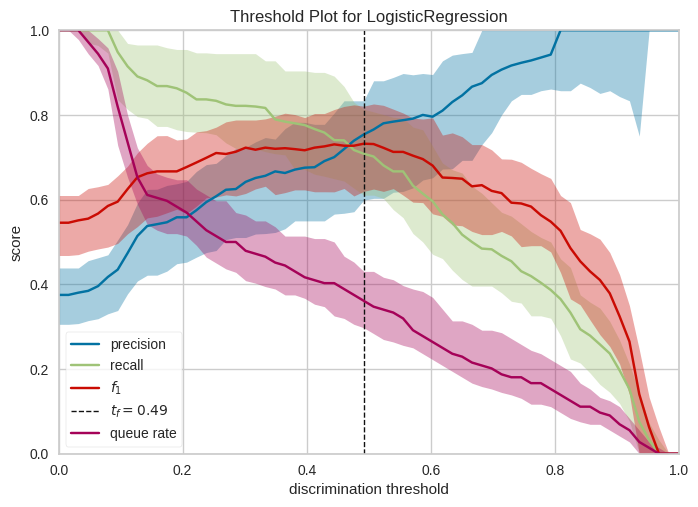

<Axes: title={'center': 'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [227]:
# Ploting the Cummulative Lift
from yellowbrick.classifier import DiscriminationThreshold
visualizer = DiscriminationThreshold(logistic_model)
visualizer.fit(X_train, y_train)
visualizer.poof()

In [211]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_preds_test = rf_model.predict(X_test)
rf_preds_train = rf_model.predict(X_train)
rf_accuracy = accuracy_score(y_test, rf_preds_test)
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5)

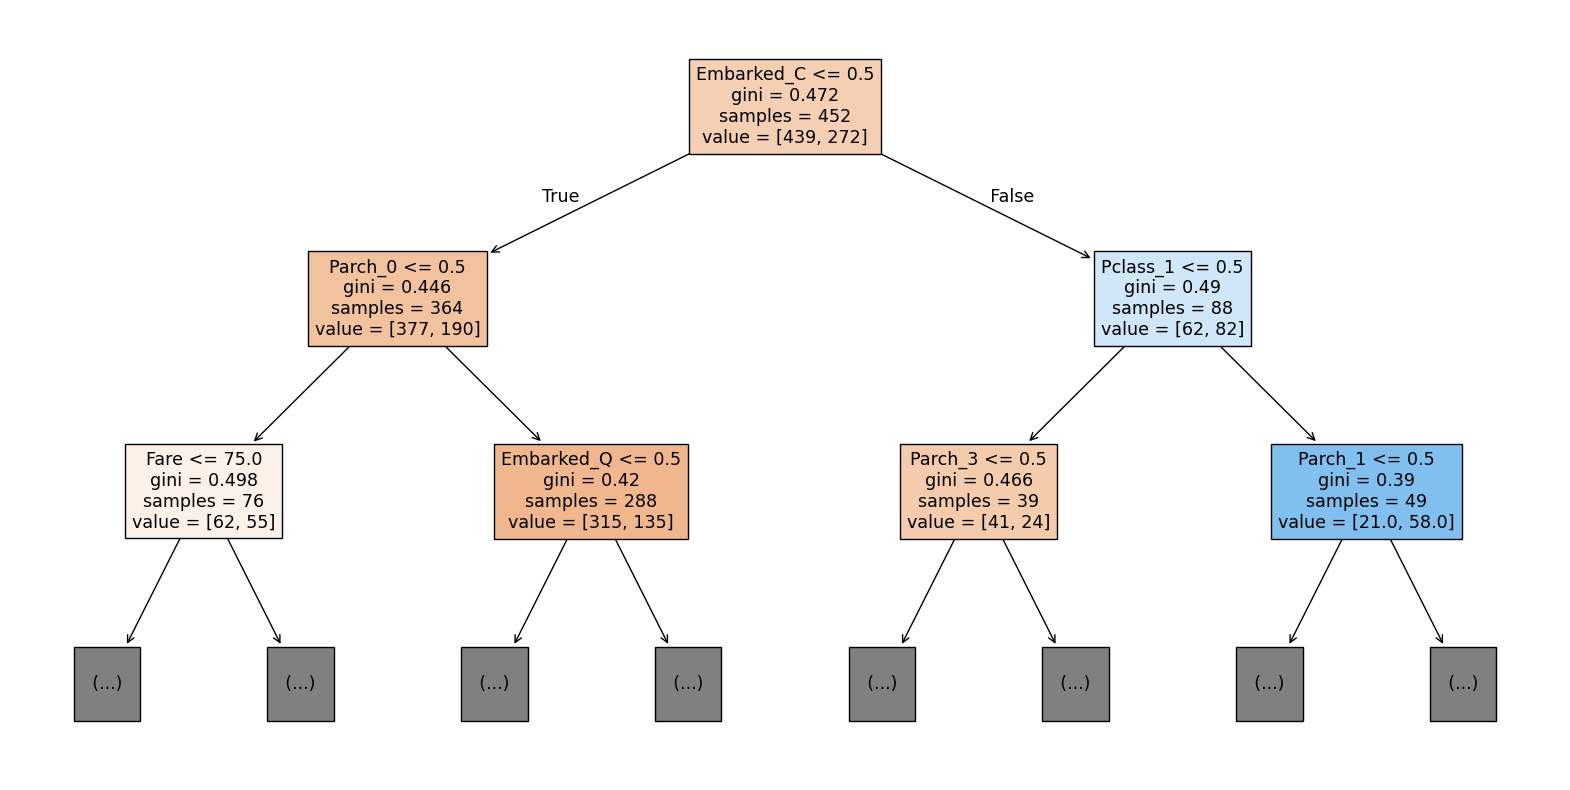

In [212]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming rf_model is your RandomForestClassifier
# Let's visualize the first tree in the forest
plt.figure(figsize=(20,10))
plot_tree(rf_model.estimators_[0], filled=True, feature_names=X.columns, max_depth=2)
plt.show()

In [213]:
print("rf_accuracy_test:", accuracy_score(y_test, rf_preds_test))
print("rf_accuracy_train:", accuracy_score(y_train, rf_preds_train))

rf_accuracy_test: 0.8089887640449438
rf_accuracy_train: 0.9620253164556962


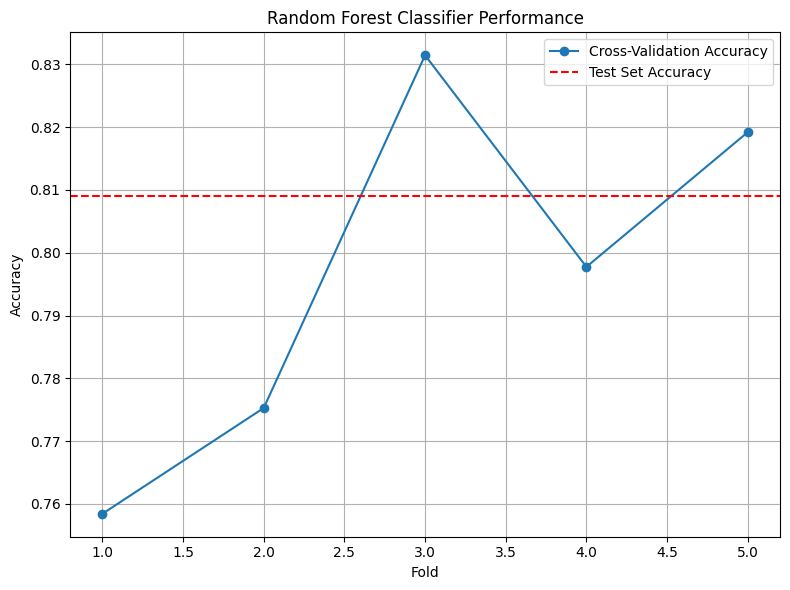

In [214]:
# Plotting
plt.figure(figsize=(8, 6))

# Plot cross-validation scores
plt.plot(range(1, 6), rf_cv_scores, marker='o', label='Cross-Validation Accuracy')

# Plot overall accuracy on test set
plt.axhline(y=rf_accuracy, color='r', linestyle='--', label='Test Set Accuracy')

plt.title('Random Forest Classifier Performance')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [215]:
# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_preds_test = svm_model.predict(X_test)
svm_preds_train = svm_model.predict(X_train)
svm_accuracy_test = accuracy_score(y_test, svm_preds_test)
svm_accuracy_train = accuracy_score(y_train, svm_preds_train)
svm_cv_scores = cross_val_score(svm_model, X, y, cv=5)

In [216]:
print("svm_accuracy_test:", accuracy_score(y_test, svm_preds_test))
print("svm_accuracy_train:", accuracy_score(y_train, svm_preds_train))

svm_accuracy_test: 0.6910112359550562
svm_accuracy_train: 0.679324894514768


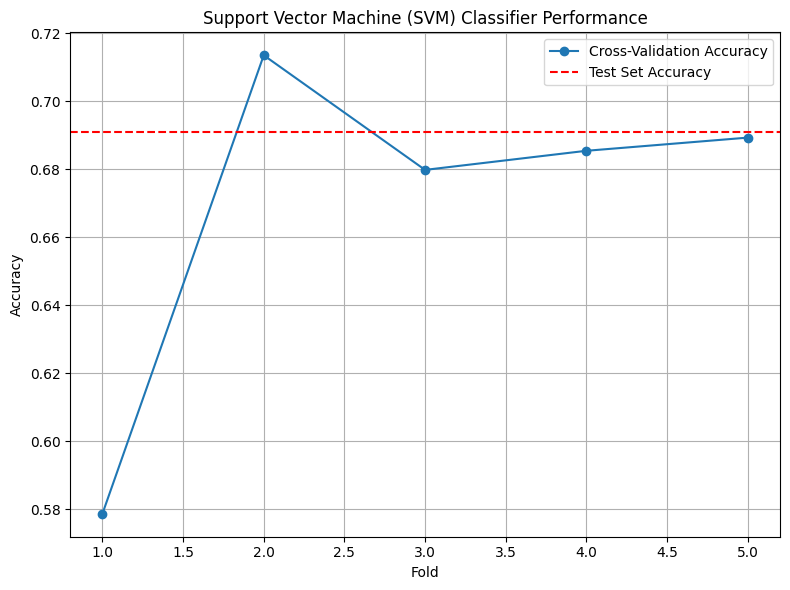

In [217]:
# Plotting
plt.figure(figsize=(8, 6))

# Plot cross-validation scores
plt.plot(range(1, 6), svm_cv_scores, marker='o', label='Cross-Validation Accuracy')

# Plot overall accuracy on test set
plt.axhline(y=svm_accuracy_test, color='r', linestyle='--', label='Test Set Accuracy')

plt.title('Support Vector Machine (SVM) Classifier Performance')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [218]:
# Print accuracy and cross-validation scores for each model
print("Logistic Regression Accuracy:", logistic_accuracy)
print("Logistic Regression Cross-Validation Scores:", logistic_cv_scores)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Cross-Validation Scores:", rf_cv_scores)
print("Support Vector Machine Accuracy:", svm_accuracy_test)
print("Support Vector Machine Cross-Validation Scores:", svm_cv_scores)

Logistic Regression Accuracy: 0.8314606741573034
Logistic Regression Cross-Validation Scores: [0.80337079 0.81460674 0.79775281 0.79775281 0.8079096 ]
Random Forest Accuracy: 0.8089887640449438
Random Forest Cross-Validation Scores: [0.75842697 0.7752809  0.83146067 0.79775281 0.81920904]
Support Vector Machine Accuracy: 0.6910112359550562
Support Vector Machine Cross-Validation Scores: [0.57865169 0.71348315 0.67977528 0.68539326 0.68926554]


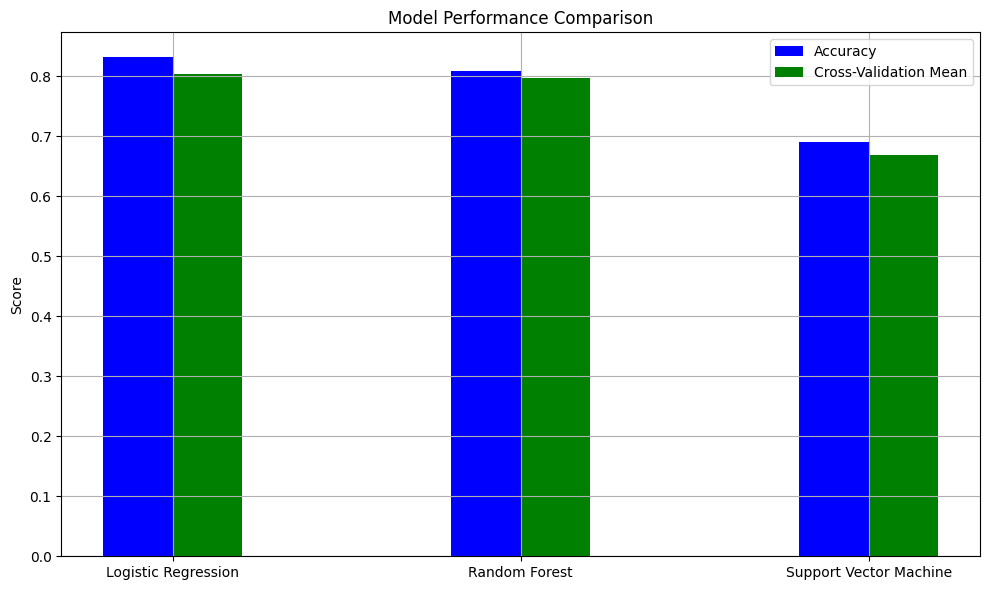

In [219]:
import numpy as np
# Combine accuracy and cross-validation scores for plotting
models = ['Logistic Regression', 'Random Forest', 'Support Vector Machine']
accuracies = [logistic_accuracy, rf_accuracy, svm_accuracy_test]
cv_scores = [logistic_cv_scores, rf_cv_scores, svm_cv_scores]

# Plotting
plt.figure(figsize=(10, 6))

# Plot accuracy for each model
plt.bar(np.arange(len(models)) - 0.1, accuracies, width=0.2, label='Accuracy', color='b')

# Plot mean cross-validation scores for each model
plt.bar(np.arange(len(models)) + 0.1, [np.mean(scores) for scores in cv_scores], width=0.2, label='Cross-Validation Mean', color='g')

plt.xticks(range(len(models)), models)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [220]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [221]:
# Select the variables for clustering (Age and Fare)
X_clustering = df[['Age', 'Fare']]# Determine the optimal number of clusters using the Elbow method
inertia = []

In [222]:
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_clustering)
    inertia.append(kmeans.inertia_)

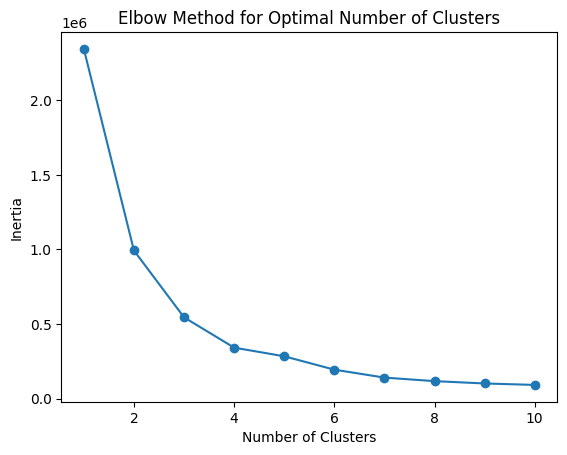

In [223]:
# Plot the Elbow method to visualize the optimal number of clusters
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [224]:
# Based on the Elbow method, choose the optimal number of clusters
k = 6
# Perform K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_clustering)

KMeans(n_clusters=6, random_state=42)

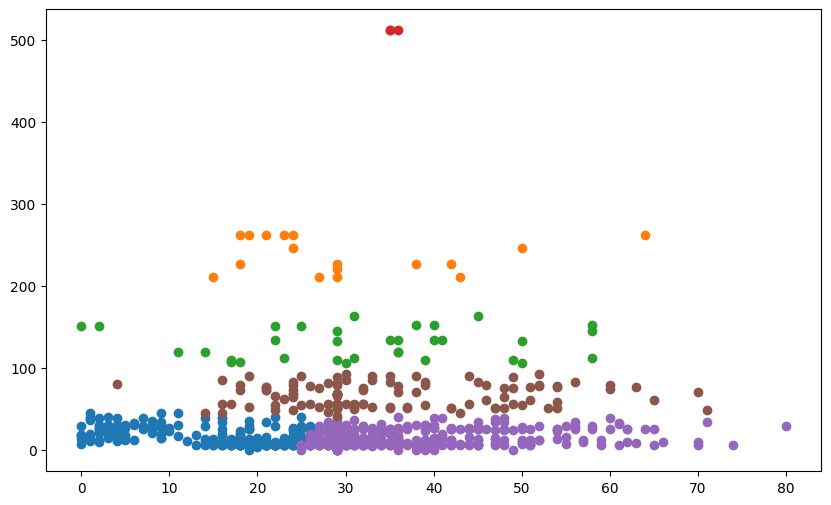

In [225]:
# Assign clusters to each data point
df['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in range(k):
    cluster_data = X_clustering[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Age'], cluster_data['Fare'], label=f'Cluster {cluster+1}')

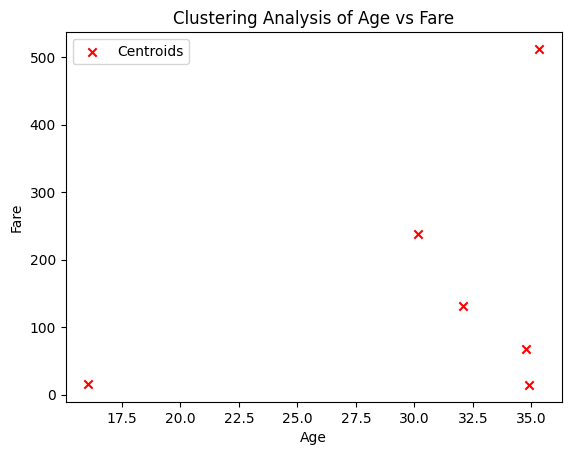

In [226]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red', label='Centroids')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Clustering Analysis of Age vs Fare')
plt.legend()
plt.show()